# Lecture-01 Practial

## Variable Measurement Scales

In [1]:
import pandas as pd
import numpy as np
from scipy import stats

# Sample data
data = {
    'nominal': ['red', 'blue', 'green', 'blue', 'red', 'green', 'green', 'red'],
    'ordinal': ['low', 'medium', 'high', 'medium', 'low', 'high', 'low', 'medium'],
    'interval': [10, 20, 30, 20, 10, 30, 20, 10],
    'ratio': [1.5, 2.3, 3.7, 2.1, 1.9, 3.5, 2.0, 1.8]
}

In [2]:
df = pd.DataFrame(data)
df

,nominal,ordinal,interval,ratio
0,red,low,10,1.5
1,blue,medium,20,2.3
2,green,high,30,3.7
3,blue,medium,20,2.1
4,red,low,10,1.9
5,green,high,30,3.5
6,green,low,20,2.0
7,red,medium,10,1.8


### Nominal data analysis

In [3]:
# Nominal data analysis
nominal_counts = df['nominal'].value_counts()
print("Nominal data counts:")
print(nominal_counts)

Nominal data counts:
nominal
red      3
green    3
blue     2
Name: count, dtype: int64


### Ordinal data analysis

In [4]:
# Ordinal data analysis
ordinal_categories = pd.Categorical(df['ordinal'], categories=['low', 'medium', 'high'], ordered=True)
ordinal_categories

['low', 'medium', 'high', 'medium', 'low', 'high', 'low', 'medium']
Categories (3, object): ['low' < 'medium' < 'high']

In [5]:
ordinal_categories = pd.Categorical(df['ordinal'], categories=['high', 'medium', 'low'], ordered=False)
ordinal_categories

['low', 'medium', 'high', 'medium', 'low', 'high', 'low', 'medium']
Categories (3, object): ['high', 'medium', 'low']

In [6]:
ordinal_counts = ordinal_categories.value_counts()
print("\nOrdinal data counts:")
print(ordinal_counts)


Ordinal data counts:
high      2
medium    3
low       3
Name: count, dtype: int64


### Interval data analysis

In [7]:
# Interval data analysis
interval_mean = np.mean(df['interval'])
interval_std = np.std(df['interval'])
print("\nInterval data analysis:")
print(f"Mean: {interval_mean}, Standard Deviation: {interval_std}")


Interval data analysis:
Mean: 18.75, Standard Deviation: 7.806247497997997


### Ratio data analysis

In [8]:
# Ratio data analysis
ratio_mean = np.mean(df['ratio'])
ratio_std = np.std(df['ratio'])
ratio_min = np.min(df['ratio'])
ratio_max = np.max(df['ratio'])
print("\nRatio data analysis:")
print(f"Mean: {ratio_mean}, Standard Deviation: {ratio_std}, Min: {ratio_min}, Max: {ratio_max}")


Ratio data analysis:
Mean: 2.35, Standard Deviation: 0.754983443527075, Min: 1.5, Max: 3.7


### Nominal data mostly used in categorical variable so we perform chi square test

In [9]:
# contingency table
pd.crosstab(df['nominal'], df['ordinal'])

ordinal,high,low,medium
nominal,,,
blue,0,0,2
green,2,1,0
red,0,2,1


In [10]:
# Example: Chi-square test for nominal data
chi2, p, _, _ = stats.chi2_contingency(pd.crosstab(df['nominal'], df['ordinal']))
print("\nChi-square test for independence between nominal and ordinal data:")
print(f"Chi2: {chi2}, p-value: {p}")


Chi-square test for independence between nominal and ordinal data:
Chi2: 8.0, p-value: 0.0915781944436709


## Frequency Distribution Graph

### Bar Graph

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

# Sample data
data = {
    'Favorite Color': ['Red', 'Blue', 'Green', 'Blue', 'Red', 'Green', 'Green', 'Red', 'Blue', 'Green'],
    'Satisfaction Level': ['Low', 'Medium', 'High', 'Medium', 'Low', 'High', 'Low', 'Medium', 'High', 'Medium']
}

# Create DataFrame
df = pd.DataFrame(data)
df

,Favorite Color,Satisfaction Level
0,Red,Low
1,Blue,Medium
2,Green,High
3,Blue,Medium
4,Red,Low
5,Green,High
6,Green,Low
7,Red,Medium
8,Blue,High
9,Green,Medium


In [12]:
# Frequency distribution for 'Favorite Color'
color_counts = df['Favorite Color'].value_counts()
color_counts

Favorite Color
Green    4
Red      3
Blue     3
Name: count, dtype: int64

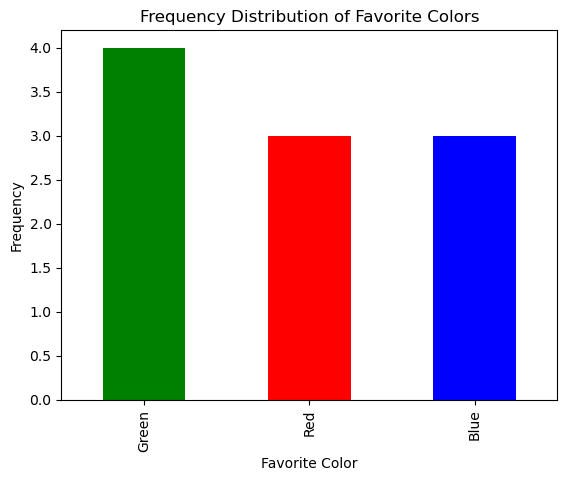

In [13]:
# Plot bar graph
color_counts.plot(kind='bar', color=['green', 'red', 'blue'])
plt.xlabel('Favorite Color')
plt.ylabel('Frequency')
plt.title('Frequency Distribution of Favorite Colors')
plt.show()

### Histogram Graph

In [14]:
import numpy as np

# Sample numerical data
df['Age'] = [22, 25, 21, 23, 22, 21, 25, 22, 23, 21]

# Frequency distribution for 'Age'
age_counts = df['Age'].value_counts().sort_index()
age_counts

Age
21    3
22    3
23    2
25    2
Name: count, dtype: int64

In [15]:
# Plot histogram
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

age = [22, 25, 21, 23, 22, 21, 25, 22, 23, 21]

df_age = pd.DataFrame(age)

df_age

,0
0,22
1,25
2,21
3,23
4,22
5,21
6,25
7,22
8,23
9,21


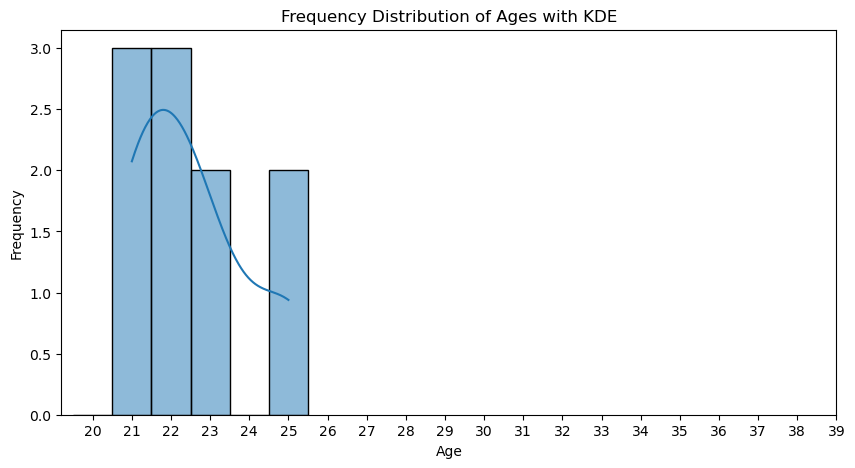

In [16]:
# Plot histogram with KDE using seaborn
plt.figure(figsize=(10, 5))
sns.histplot(df['Age'], bins=np.arange(20, 27) - 0.5, kde=True, edgecolor='black')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Frequency Distribution of Ages with KDE')
plt.xticks(range(20, 40))
plt.show()

    np.arange(20, 27):
        This generates an array of values starting from 20 up to (but not including) 27.
        It will produce the array [20, 21, 22, 23, 24, 25, 26].

    - 0.5:
        This subtracts 0.5 from each element of the array [20, 21, 22, 23, 24, 25, 26].
        It shifts the bins slightly to the left, resulting in the array [19.5, 20.5, 21.5, 22.5, 23.5, 24.5, 25.5].

Why Shift the Bins?

Shifting the bins by 0.5 ensures that each bin is centered around the integer age values. This way, the bin edges fall between the integer values, making the histogram more intuitive to read. For example, a bin edge at 19.5 to 20.5 means that the bin effectively covers ages around 20.

#### Prepared By,
Ahamed Basith